In [52]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [53]:
#Parameters
S0 = 100
v0 = 0.25
theta = 0.25
k = 2
xi = 0.5
r = 0.05
T = 1

In [54]:
# Define steps
M = int(1e+5)
M2 = int(1e+4)

num_steps = int(M/M2)

steps = [1 + i*M2 for i in range(0,num_steps + 1)]

In [55]:
# Initialize error arrays
hh = []
err1 = []
err2 = []

for p in range(1, 8):
    N = 2**p
    h = T/N
    
    sum1 = 0
    sum2 = 0
    
    for m in steps:
        m2 = min(M2, M-m+1)
        
        # Initial condition
        S = S0*np.ones((1,m2))[0]
        S2 = S0*np.ones((1,m2))[0]
        v = v0*np.ones((1, m2))[0]
        v2 = v0*np.ones((1, m2))[0]
        
        for n in range(1, int(N/2) + 1):
            
            # h approximation
            dW1 = math.sqrt(h)*np.random.multivariate_normal([0,0], [[1, -0.1], [-0.1, 1]], m2)
            v = [v[i] + k*(theta-v[i])*h + xi*math.sqrt(abs(v[i]))*dW1[i][0] for i in range(0, m2)]
            S = [S[i] + r*S[i]*h + math.sqrt(abs(v[i]))*S[i]*dW1[i][1] for i in range(0, m2)]
            dW2 = math.sqrt(h)*np.random.multivariate_normal([0,0], [[1, -0.1], [-0.1, 1]], m2)
            v = [v[i] + k*(theta-v[i])*h + xi*math.sqrt(abs(v[i]))*dW2[i][0] for i in range(0, m2)]
            S = [S[i] + r*S[i]*h + math.sqrt(abs(v[i]))*S[i]*dW2[i][1] for i in range(0, m2)]
            
            # 2h approximation
            v2 = [v2[i] + k*(theta-v2[i])*2*h + xi*math.sqrt(abs(v2[i]))*(dW1[i][0]+dW2[i][0]) for i in range(0, m2)]
            S2 = [S2[i] + r*S2[i]*2*h + math.sqrt(abs(v2[i]))*S2[i]*(dW1[i][1]+dW2[i][1]) for i in range(0, m2)]
            
        # Update for error calculations    
        delta = [(S2[i] - S[i])**2 for i in range(0,m2)]
        sum1 = sum1 + np.sum(delta)
        sum2 = sum2 + np.sum([d**2 for d in delta])
    
    # Append errors and h value to respective arrays
    hh.append(h)
    
    Vd = sum1/M
    sd = math.sqrt((sum2/M - (sum1/M)**2)/(M-1))
    err1.append(math.sqrt(Vd))
    err2.append((0.5/math.sqrt(Vd))*3*sd)

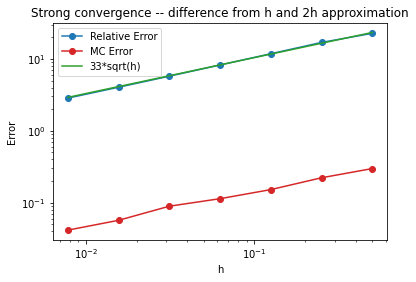

In [56]:
# Plot the difference from h and 2h approximation
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.loglog(hh, err1, color = 'tab:blue', marker = 'o', label = 'Relative Error')
ax.loglog(hh, err2, color = 'tab:red', marker = 'o', label = 'MC Error')
ax.loglog(hh,33*np.asarray(hh)**(1/2), color = 'tab:green', label = '33*sqrt(h)')
ax.legend(loc='upper left')
ax.set_xlabel('h')
ax.set_ylabel('Error')
ax.set_title('Strong convergence -- difference from h and 2h approximation')
plt.show()

By Kloeden and Platen, the expected order of convergence is 0.5. We can see that this agrees very well with the observed results based on the graph above.